Optimal value:
x1       0.0
x2       1.0
x3       2.0
f        0.0
sweep    0.0
node     0.0
Name: 428, dtype: float64

Number of objective function calls: 1125
Number of cached function accesses: 1395
Total number calls: 2520


,x1,x2,x3,f,sweep,node
0,0.0,1.8,0.4,3.20,0,2
1,0.2,1.8,0.4,3.24,0,2
2,0.4,1.8,0.4,3.36,0,2
3,0.6,1.8,0.4,3.56,0,2
4,0.8,1.8,0.4,3.84,0,2
...,...,...,...,...,...,...
1120,0.4,1.0,3.0,1.16,2,0
1121,0.4,1.0,3.2,1.60,2,0
1122,0.4,1.0,3.4,2.12,2,0
1123,0.4,1.0,3.6,2.72,2,0


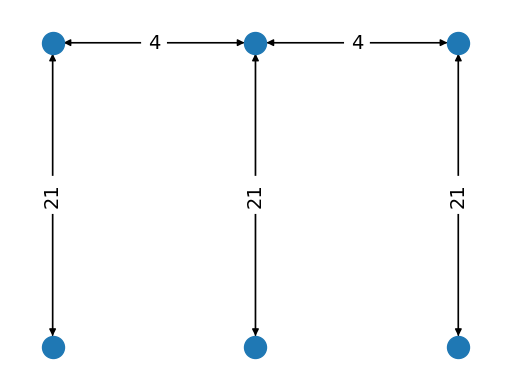

In [5]:
"""
Minimal example: optimize 3D V(x) with tensor train.
See next cell for balanced tree and how to provide starting points.
"""
from qutree import *

def V(x):
    # p = [1, 2, 3, ...]
    point = np.array(list(range(x.shape[0])))
    return np.sum((x-point)**2)

objective = Objective(V)

N, r, f, nsweeps, seed = 21, 4, 3, 3, 238141

# --- Pick a network structure: ---
G = tensor_train_graph(f, r, N)
fig = plot_tt_diagram(G)

# boundaries of primitive grid
primitive_grid = [np.linspace(0., 4., num = N)] * f

G_opt = ttnopt(G, objective, nsweeps, primitive_grid)

# Display output (can vary with random parameters)
print(objective)
display(objective.logger.df)

Optimal value:
x1       0.0
x2       1.0
x3       2.0
f        0.0
sweep    0.0
node     0.0
Name: 428, dtype: float64

Number of objective function calls: 1741
Number of cached function accesses: 2111
Total number calls: 3852


,x1,x2,x3,f,sweep,node
0,0.0,1.8,0.4,3.20,0,2
1,0.2,1.8,0.4,3.24,0,2
2,0.4,1.8,0.4,3.36,0,2
3,0.6,1.8,0.4,3.56,0,2
4,0.8,1.8,0.4,3.84,0,2
...,...,...,...,...,...,...
1736,1.2,2.6,0.4,6.56,2,3
1737,1.2,2.6,0.6,5.96,2,3
1738,1.2,1.2,0.0,5.48,2,3
1739,1.2,1.2,0.4,4.04,2,3


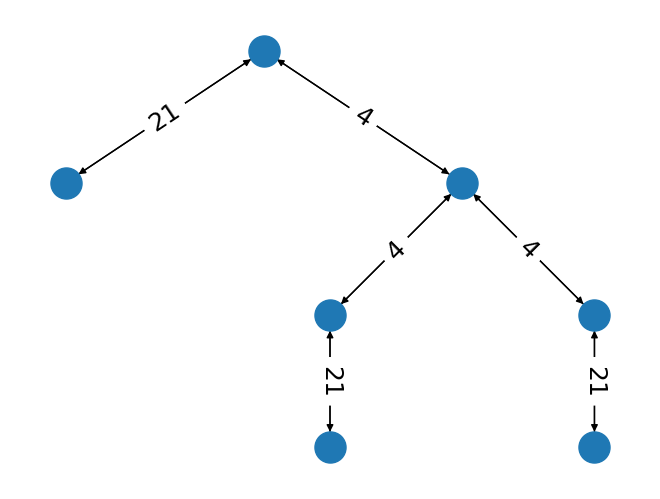

In [6]:
"""
Same example as above but with balanced tree and start guess.

This 3D example is much too small to see the scaling differences
but the formal scaling for same rank and dimension, it is
TT: f * r**2 * N    BT: f * N * r + r**3 * log_2(f) 
They look more alike if a logical layer in the TT is introduced:
TT+1layer: f * N * r + r**3 * f
(The major difference being log_2(f) vs. f).
"""
# optional start points (f x (>=r)) (this will converge in 1 sweep)
start_grid = np.array([[0., 0., 0.],
                       [1., 2., 4.],
                       [2., 5., 3.],
                       [4., 3., 1.]])

# This will generatae as close-to balanced tree as possible
G = balanced_tree(f, r, N)
plot_tree(G)
G_opt = ttnopt(G, objective, nsweeps, primitive_grid, start_grid)

print(objective)
display(objective.logger.df)